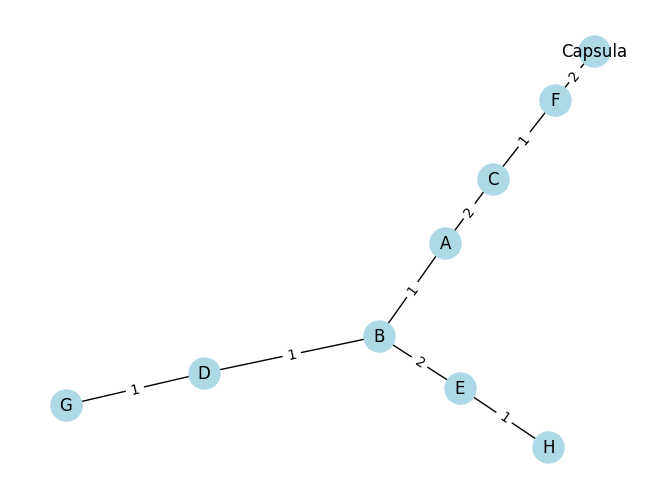

La ruta más corta es: ['A', 'C', 'F', 'Capsula']


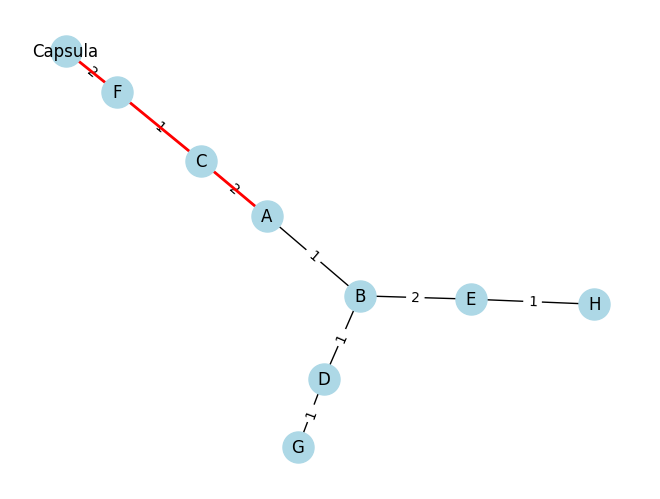

In [9]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

def leer_grafo(archivo):
    G = nx.Graph()
    with open(archivo, 'r') as f:
        for linea in f:
            datos = linea.strip().split()
            nodo1, nodo2, dificultad = datos[0], datos[1], int(datos[2])
            G.add_edge(nodo1, nodo2, weight=dificultad)
    return G

""""
Se utilizó dijkstra, ya que es un algoritmo que permite encontrar la ruta más corta entre dos nodos en un grafo ponderado positivo y es el que fue enseñado en clase.
"""
def dijkstra(G, inicio, destino):
            queue = [(0, inicio, [])]
            seen = set()
            while queue:
                (cost, v1, path) = heapq.heappop(queue)
                if v1 in seen:
                    continue
                path = path + [v1]
                seen.add(v1)
                if v1 == destino:
                    return path
                for (v2, c) in G[v1].items():
                    if v2 not in seen:
                        heapq.heappush(queue, (cost + c['weight'], v2, path))
            return None


def ruta_mas_corta(G, inicio, destino):
    try:
        return dijkstra(G, inicio, destino)
        #nx.dijkstra_path(G, inicio, destino)
    
        
    except nx.NetworkXNoPath:
        return None

def dibujar_grafo(G, ruta=None):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)  # Tamaño de los nodos reducido
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if ruta:
        path_edges = list(zip(ruta, ruta[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.show()

def dibujar_grafo_original(G):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Paso 1: Leer grafo desde archivo
archivo = 'modulos.txt'
G = leer_grafo(archivo)

# Paso 2: Encontrar la ruta más corta y segura
inicio = 'A'  # Módulo inicial de los astronautas
destino = 'Capsula'  # Cápsula de escape

dibujar_grafo_original(G)
ruta_segura = ruta_mas_corta(G, inicio, destino)

if ruta_segura:
    print(f"La ruta más corta es: {ruta_segura}")
else:
    print("No hay ruta disponible.")

# Paso 3: Dibujar el grafo original y el resultante
dibujar_grafo(G, ruta_segura)
